In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('en.openfoodfacts.org.products.tsv', sep = '\t')

/home/vadok/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


## Dealing with extra Columns and Null Values

In [4]:
data = data.dropna(axis= 1,thresh=50000)

In [ ]:
#Droped all the columns which had less than 50.000 full rows because I would not be able to infer any 
#usefull information for the rest of the data


In [5]:
data.dropna(subset=['product_name'], inplace = True)

In [6]:
data = data.drop(['url','created_t','last_modified_t','countries_tags','countries'], axis = 1)

In [7]:
data= data.drop(['states','states_tags','states_en'], axis = 1)

In [8]:
data= data.drop(['creator'], axis = 1)

In [9]:
data = data.drop(['purchase_places','stores'], axis = 1)

In [10]:
data.dropna(subset=['code'], inplace = True)

In [11]:
data = data.drop(['image_url','image_small_url',], axis = 1)

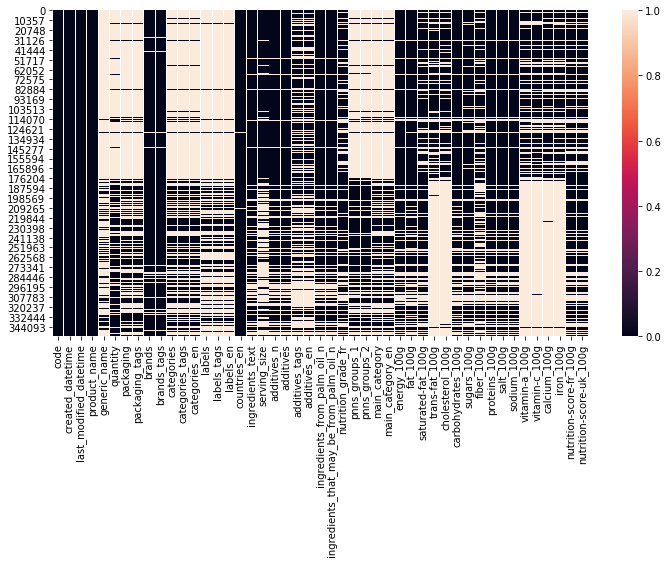

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())

In [ ]:
#deleted some extra columns that give no extra information

In [ ]:
# For my analysis i will use certain columns, so for memory conservation and utility I will drop all the other

In [13]:
data = data.drop(['generic_name','quantity','packaging','packaging_tags','brands_tags','categories','categories_tags','categories_en','labels','labels_tags','labels_en','serving_size','additives_n','additives','additives_en','additives_tags','pnns_groups_1','pnns_groups_2','main_category','main_category_en'], axis = 1)

In [14]:
# Getting rid of the null values in the nutritional columns
data.dropna(subset = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g','saturated-fat_100g','trans-fat_100g'], inplace = True)

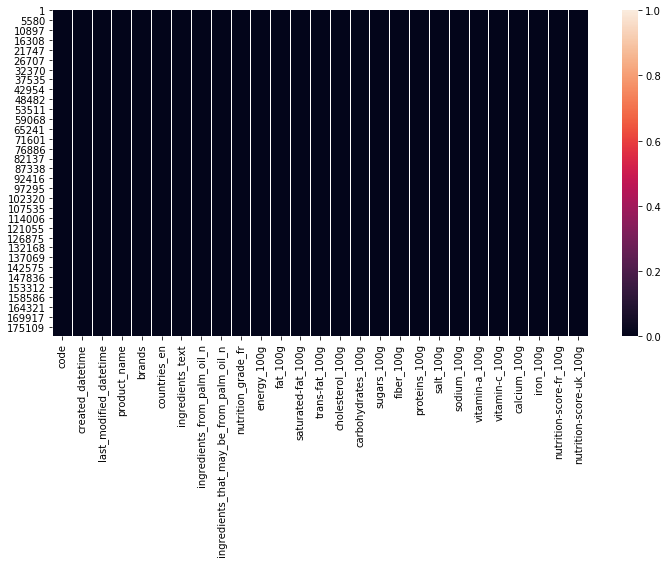

In [15]:
#another heatmap of the nulls to see how is the data looking now
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())

In [16]:
data.code.value_counts()
#A lot of repeating values in the code column which means dublicate entries


9800892204       2
72220009941      2
609962037        2
72101011766      2
75925302300      2
75925302317      2
35493013909      2
737628062508     2
72220008593      2
75925299983      2
75925300894      2
688267155079     2
4711567123489    2
16073123454      2
72101012305      2
637480006835     2
69276070056      2
74880070033      2
70650600028      2
74880030037      2
70650800312      2
37600110754      2
737229001135     2
70650800091      2
876045004026     2
76186000028      2
75925301709      2
23923201965      2
37600105033      2
13562000784      2
                ..
660726525166     1
41573592301      1
819893021906     1
2010299          1
748239105218     1
691535523012     1
81864600773      1
660726525128     1
748239105225     1
71580100183      1
30034013387      1
620133002445     1
36800354579      1
660726525135     1
0099482449513    1
660726525142     1
41303059692      1
19722841303      1
0099482439323    1
97831005403      1
2010332          1
35826085085 

In [17]:
data.drop_duplicates(subset=['code'], keep='first', inplace=True)

In [18]:
#checking if it worked
sum(data.code.value_counts() >1)

0

In [19]:
data.dtypes
#datetime is an object so i have to convert it to datetime

code                                        object
created_datetime                            object
last_modified_datetime                      object
product_name                                object
brands                                      object
countries_en                                object
ingredients_text                            object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
trans-fat_100g                             float64
cholesterol_100g                           float64
carbohydrates_100g                         float64
sugars_100g                                float64
fiber_100g                                 float64
proteins_100g                              float64
salt_100g                      

In [20]:
data['created_datetime']=pd.to_datetime(data['created_datetime'],yearfirst=True)
data['last_modified_datetime']=pd.to_datetime(data['last_modified_datetime'],yearfirst=True)                                             
     

In [21]:
data.dropna(subset=['brands','ingredients_text'], inplace = True)
#cleaning the null values from these columns becausei cannot fill them with information which is going to be useful

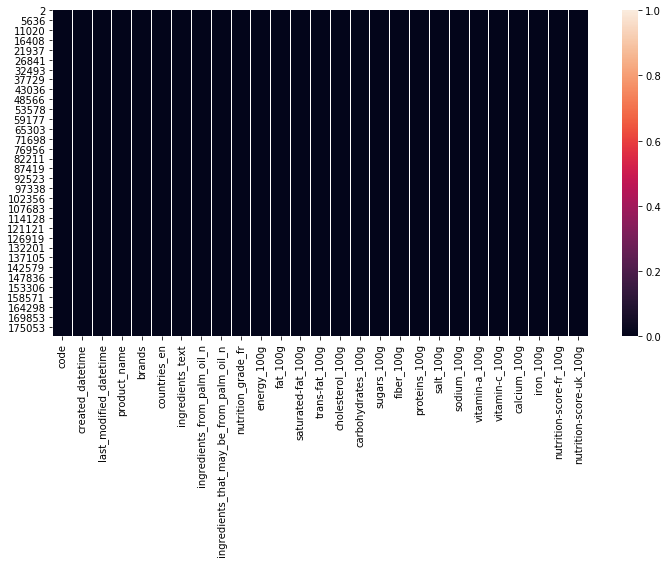

In [22]:
#another heatmap of the nulls to see how is the data looking now
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())

In [23]:
print(data['nutrition_grade_fr'],data['nutrition-score-fr_100g'])
#found out that nutrition grade and nutrition score have values in the same rows, so getting information from one to fill the other is not possible

2         b
79        c
82        d
148       c
149       c
150       d
151       b
152       e
153       e
154       b
175       a
182       c
183       b
187       b
200       d
201       d
202       b
203       e
204       d
205       e
206       b
207       e
208       e
209       e
210       d
211       d
212       b
213       d
214       e
215       e
         ..
355431    e
355595    b
355609    a
355610    b
355611    b
355612    c
355613    c
355706    d
355787    d
355788    e
355789    d
355791    c
355792    d
355793    c
355794    a
355801    b
355802    b
355810    e
355818    d
355819    d
355821    c
355831    c
355844    e
355859    d
355860    d
355883    c
355884    b
355968    d
355985    a
356022    b
Name: nutrition_grade_fr, Length: 125316, dtype: object 2          0.0
79         6.0
82        14.0
148        8.0
149        8.0
150       14.0
151        0.0
152       19.0
153       25.0
154        0.0
175       -2.0
182        9.0
183        1.0
187        2.0
20

In [24]:
data = data.drop(['nutrition_grade_fr'], axis = 1)

In [25]:
data['nutrition-score-fr_100g'].fillna(value=data['nutrition-score-fr_100g'].mean(),inplace = True)
data['nutrition-score-uk_100g'].fillna(value=data['nutrition-score-uk_100g'].mean(),inplace = True)
#filling the NaN values with the mean score

In [74]:
# I take the average of both nutrition scores
data['average_nut_score'] = (data['nutrition-score-fr_100g'] + data['nutrition-score-uk_100g'])/2

In [26]:
data.countries_en.value_counts()
#there are more than one countries per row in some cases

United States                                             125014
Canada                                                       107
France,United States                                          87
France                                                        31
Australia,United States                                       13
United Kingdom,United States                                  12
Canada,United States                                           9
Switzerland,United States                                      6
Canada,France                                                  3
Spain,United States                                            3
Germany,United States                                          3
Singapore,United States                                        2
Tunisia                                                        2
Belgium,Switzerland,United States                              2
France,Switzerland,United States                               2
Netherlands,United States

In [27]:
data['countries'] = data.countries_en.str.split(',',expand=False)

In [28]:
data.dropna(subset=['countries'], inplace = True)
data.countries.value_counts

<bound method IndexOpsMixin.value_counts of 2         [United States]
79        [United States]
82        [United States]
148       [United States]
149       [United States]
150       [United States]
151       [United States]
152       [United States]
153       [United States]
154       [United States]
175       [United States]
182              [Canada]
183              [Canada]
187              [Canada]
200       [United States]
201       [United States]
202       [United States]
203       [United States]
204       [United States]
205       [United States]
206       [United States]
207       [United States]
208       [United States]
209       [United States]
210       [United States]
211       [United States]
212       [United States]
213       [United States]
214       [United States]
215       [United States]
               ...       
355431    [United States]
355595    [United States]
355609    [United States]
355610    [United States]
355611    [United States]
355612    [United St

In [29]:
data = data.reset_index(drop= True)
# the original indexes are kept so i will reset them to reflect tha changes I did in the data

In [30]:
import re
#importing re to support a better text clearing

# Cleaning up the text data ( Question C )

In [31]:
def removepar(str): 
    str = re.sub(r'\([^)]*\)*','', str)
    return str 
def removete(str): 
    str = re.sub(r'\,[^:]*\:','', str)
    return str 

ingredients = data['ingredients_text'].apply(removepar)

ingredients.value_counts()
#Making 2 functions that: 
# 1. delete anything between parentheses who are analysis of ingredients 
# 2. Delete anything between a comma and a ':' because its an analysis word again

ingredients = ingredients.apply(removete)

In [32]:
ingredients = ingredients.str.replace('.','')
ingredients.value_counts()
# Some of the ingredients are seperated by fullstops

ingredients=ingredients.str.replace('_',' ')
# underscores instead of whitespaces

ingredients= ingredients.str.replace('%','')
ingredients= ingredients.str.replace('\d','')
#removing the percentages

ingredients = ingredients.str.lower()
#making everything lowercase

ingredients = ingredients.str.replace('*','')
ingredients = ingredients.str.replace('/','')
ingredients = ingredients.str.replace(';',',')
#some extra symbols that would make the seperation harder

ingredients = ingredients.str.replace('@',',')
ingredients = ingredients.str.replace('{',',')
ingredients = ingredients.str.replace(']',',')
ingredients = ingredients.str.replace('[',',')
ingredients = ingredients.str.replace('}',',')
# in case any of these exist, I will treat them as seperators

ingredients = ingredients.str.split(',')

In [34]:
ingredientsl = []
for item in ingredients:
    for word in item:
        if len(word) >=3:
            ingredientsl.append(word.strip())
# I exclude any words less than 4 because they are probably filler words that got in by accident.
# Also taking away all the whitespaces by appending the .strip of the string

In [35]:
Ingredientsp = pd.DataFrame(data = ingredientsl, columns=(['ing']))
Ingredientsp['count'] = 1
#I make it a dataframe so I can find the value counts easier

In [36]:
Ingredientsp['ing'].value_counts()
# I can see that there are clear winners but the french translation of the ingredients is also in the top 10
# I am going to translate any french word in the top 10 to english for better results

salt                                                    44510
sugar                                                   36386
water                                                   29292
citric acid                                             13453
sea salt                                                10367
corn syrup                                              10252
natural flavor                                           8121
spices                                                   8090
soy lecithin                                             7117
dextrose                                                 6527
xanthan gum                                              6132
soybean oil                                              6012
garlic                                                   5561
whey                                                     5471
natural flavors                                          5444
vegetable oil                                            5305
maltodex

In [37]:
translator = {'sel':'salt','sea salt':'salt','eau':'water','sucre':'sugar'}
Ingredientsp['ing'].replace(translator, inplace =True)
#mapping the dictionary with the translations in the new dataframe

In [38]:
Ingredientsp['ing'].value_counts()

salt                                                    54939
sugar                                                   36428
water                                                   29318
citric acid                                             13453
corn syrup                                              10252
natural flavor                                           8121
spices                                                   8090
soy lecithin                                             7117
dextrose                                                 6527
xanthan gum                                              6132
soybean oil                                              6012
garlic                                                   5561
whey                                                     5471
natural flavors                                          5444
vegetable oil                                            5305
maltodextrin                                             5132
guar gum

In [39]:
counts = pd.DataFrame(Ingredientsp.ing.value_counts())

In [41]:
counts = counts.reset_index(drop = False)


In [42]:
counts=counts.rename(columns={'index':'ingredients','ing':'Count'})



In [43]:
counts[0:5]
#these are the top 5 ingredients

,level_0,ingredients,Count
0,0,salt,54939
1,1,sugar,36428
2,2,water,29318
3,3,citric acid,13453
4,4,corn syrup,10252


## Manipulating the Data ( Question B)

In [ ]:
#The 3 questions that I think that are intresting are the following
#What is the fat/energy ratio 
#What is the ratio of fat/energy for the 5 most common Countries
#Which stores brands have the best foods?

In [44]:
# First I will throw out any outliers and columns that do not add any value for the questions

data.drop(columns=['ingredients_from_palm_oil_n'], inplace=True)


# Keeping data that is within 3 standard deviations to avoid problems with outliers
for col in list(data.columns)[8:23]:
    data[col] = np.abs(data[col])
for col in list(data.columns)[8:23]:
    data = data[np.abs(data[col] - data[col].mean()) <= (3*data[col].std())]

In [45]:
#there are 955 lines with 0 in the collumn energy, which is not helpful, so I am dropping them
data = data[data['energy_100g']!=0]

/home/vadok/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


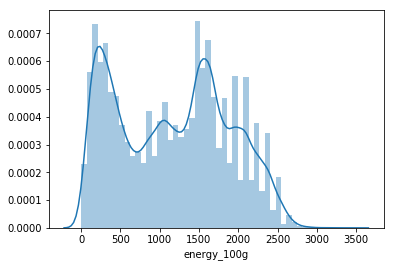

In [46]:
# Making a distplot to understand the distribution of the energy and the fat
sns.distplot(data['energy_100g'])

/home/vadok/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


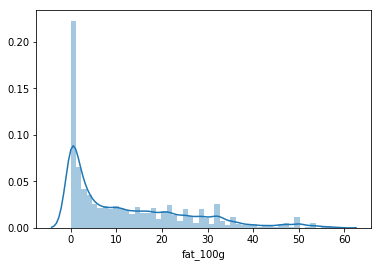

In [47]:
sns.distplot(data['fat_100g'])
#there is a significant amoun of foods with 0 fat but this is something that makes sense

In [48]:
#creating the ratio of fat to energy
data['fat_to_energy'] = data['fat_100g']/data['energy_100g']

In [49]:
# Since countries is a list of lists i will make it a single list to be able to parse through them and find the top5
countriesls = []
for lst in data['countries']:
    countriesls.extend(lst)

Countries2 = pd.DataFrame(countriesls,columns=['Country']) 
        

In [50]:
Countries2['Country'].value_counts()
# Here i can see the 5 Countries that appear the most

United States                112255
France                          119
Canada                          106
United Kingdom                   12
Switzerland                      10
Australia                         9
Spain                             4
Belgium                           4
Italy                             2
Denmark                           2
Singapore                         2
Netherlands                       2
Germany                           2
Saint Pierre and Miquelon         2
Tunisia                           2
Russia                            1
Hong Kong                         1
Colombia                          1
Malaysia                          1
Nederland                         1
Indonesia                         1
Name: Country, dtype: int64

In [51]:
#reseting the index after the changes
data.reset_index(inplace=True,drop=True)

In [52]:
top5  = ['United States','France','Canada','United Kingdom','Switzerland']
#making a list with the top 5 countries to iterate

In [54]:
# I take only the columns that i will use
db = data.loc[:, ['code', 'countries', 'average_nut_score','fat_to_energy']]

# making a DF with all the entries that have more than 1 country
db1 = db[db['countries'].apply(lambda x: len(x)) > 1] 
db1.reset_index(drop=True, inplace=True) 

#making a copy of the db1 to be used as auxiliary
db1c = db[db['countries'].apply(lambda x: len(x)) > 1]
db1c.reset_index(drop=True, inplace=True) 

# making another DF with the entries where there is only 1 country, to be used as the final
db2 = db[db['countries'].apply(lambda x: len(x)) == 1] 
db2.reset_index(drop=True, inplace=True)

# for the DF with the single country I remove the list 
db2['countries'] = db2['countries'].apply(lambda x: x[0]) 




/home/vadok/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/vadok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
# I use db1c as an auxiliary DF to temporarily put each country off the list and immediately append it to db2
for i in range(db1.shape[0]):
    for country in db1c.loc[i, 'countries']:
        for j in range(len(top5)):
            if country == top5[j]:
                db1.iloc[i, 1] = country
                db2 = db2.append(db1.iloc[i,:])

/home/vadok/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
# removing the outliers from the column for more meaningful results
db2 = db2[np.abs(db2['fat_to_energy'] - db2['fat_to_energy'].mean()) <= (3*db2['fat_to_energy'].std())]

In [57]:
# keeping only the countries that i chose
db2 = db2[db2['countries'].apply(lambda x: x in top5)]
db2.reset_index(drop=True, inplace=True)

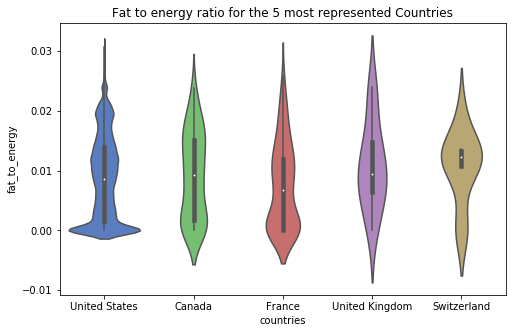

In [63]:
plt.figure(figsize=(8,5))
plt.title('Fat to energy ratio for the 5 most represented Countries')
sns.violinplot( y = 'fat_to_energy', data= db2, x ='countries', palette = 'muted' )

In [ ]:
# There are more than one brands per item so I am splitting them
data['brands']=data['brands'].str.split(',')



In [65]:
#making a new dataframe consiting only of those brands in order to find out which ones are the most prominent
brandls = []
for lst in data['brands']:
    brandls.extend(lst)

brand2 = pd.DataFrame(brandls,columns=['Brand']) 

brand2['Brand'].value_counts()

In [67]:
# I take some of the most populous brands as my computer memory allows
topbr = ['Meijer','Kroger','Great Value','Spartan','Ahold','Weis',"Roundy's",'Food Lion','Shoprite','Target Stores','Giant Eagle']

In [76]:
# Makign a dataframe to keep only the data I need
df = data.loc[:, ['code', 'brands', 'average_nut_score',]]
df.head()

#Similarly I make 1 dataframe with all the entries with one brand , 1 dataframe with all the entries with above one
# And one copy Dataframe to use as an auxiliary

df1 = df[df['brands'].apply(lambda x: len(x)) > 1]
df1.reset_index(drop=True, inplace=True)

df2 = df[df['brands'].apply(lambda x: len(x)) == 1]
df2.reset_index(drop=True, inplace=True)

df1c = df[df['brands'].apply(lambda x: len(x)) > 1]
df1c.reset_index(drop=True, inplace=True)

#Removing the lists
df2['brands'] = df2['brands'].apply(lambda x: x[0])
df2

for i in range(df1.shape[0]):
    for brand in df1c.loc[i, 'brands']:
        for j in range(len(topbr)):
            if brand == topbr[j]:
                df1.iloc[i, 1] = brand
                df2 = df2.append(df1.iloc[i,:])

/home/vadok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/vadok/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [77]:
#get rid of the df2 leftovers
df2 = df2[df2['brands'].apply(lambda x: x in topbr)]
df2.reset_index(drop=True, inplace=True)

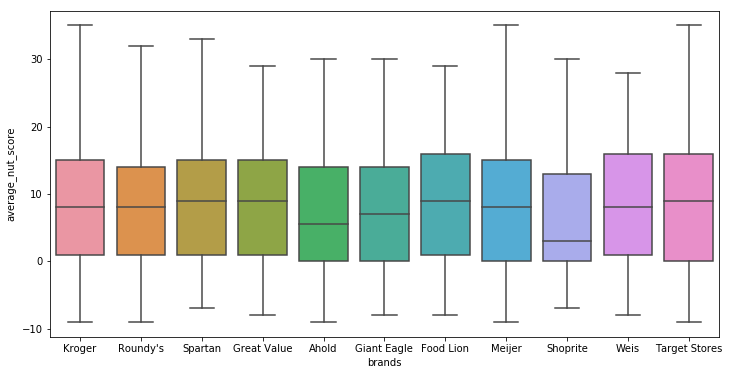

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(data= df2 , x = 'brands', y = 'average_nut_score')



## Time-series analysis (Question D)

In [79]:
# Since i only need two columns that are full from the beggining I am going to import them from the original file

datetime = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', usecols=[4,6])
datetime.dropna(inplace=True)
datetime.reset_index(drop=True, inplace=True)

In [80]:
# when trying to convert directly there is an error. Selecting only the proper length to ensure uniformity
datetime = datetime[datetime['created_datetime'].str.len() == 20]
datetime = datetime[datetime['last_modified_datetime'].str.len() == 20]

In [81]:
datetime['created_datetime'] = pd.to_datetime(datetime['created_datetime'])
datetime['last_modified_datetime'] = pd.to_datetime(datetime['last_modified_datetime'])

In [82]:
#making a new column where I am going to save the difference
datetime['diff'] = datetime['last_modified_datetime'] -datetime['created_datetime']

In [84]:
# this is the mean difference betwwen the creation and the modification
datetime['diff'].mean()

Timedelta('108 days 03:35:07.638426')

In [85]:
datetime = datetime.sort_values('created_datetime')
datetime = datetime.set_index('created_datetime')
#sorting them by datetime of creation and putting it as an index

In [88]:
permonth2 = datetime.resample('M').count()
# Grouping them by month and taking the count
permonth2

,last_modified_datetime,diff
created_datetime,,
2012-01-31,1,1
2012-02-29,13,13
2012-03-31,170,170
2012-04-30,221,221
2012-05-31,458,458
2012-06-30,904,904
2012-07-31,516,516
2012-08-31,164,164
2012-09-30,460,460


In [89]:
# I only need one column for this
permonth2 = permonth2.drop(['last_modified_datetime'], axis= 1)

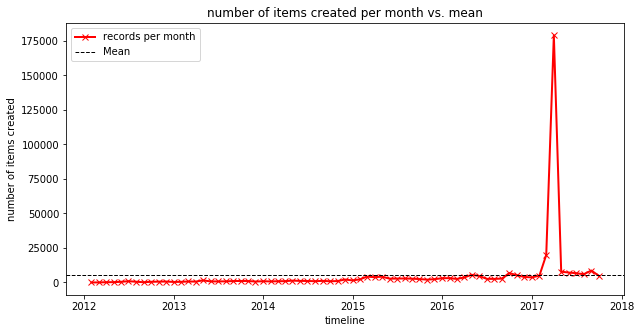

In [90]:
plt.figure(figsize=(10,5))
plt.plot(permonth2.index, permonth2['diff'], color='red', lw=2, marker='x', label='records per month')
plt.axhline(y= permonth2['diff'].mean(), label='Mean', linestyle='--', color='black', lw = 1)
plt.xlabel('timeline')
plt.ylabel('number of items created')
plt.title('number of items created per month vs. mean')
plt.legend(loc='upper left')
plt.show()

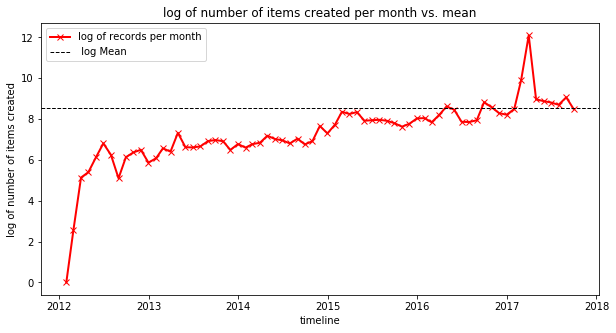

In [102]:
#The bog spike in 2017 is burrying the other data in the graph so i use the log of the data for better visualisation
plt.figure(figsize=(10,5))
plt.plot(permonth2.index, np.log((permonth2['diff'])), color='red', lw=2, marker='x', label='log of records per month')
plt.axhline(y= np.log(permonth2['diff'].mean()), label=' log Mean', linestyle='--', color='black', lw = 1)
plt.xlabel('timeline')
plt.ylabel('log of number of items created')
plt.title('log of number of items created per month vs. mean')
plt.legend(loc='upper left')
plt.show()

## Creating the Database (Question E)

In [121]:
# I will keep the first 1000 entries and the columns (code,product_name,brands,countries_en,energy_100g)
dt = data.loc[0:999, ['code', 'product_name','fat_100g', 'countries_en', 'energy_100g']]
dt.head()

,code,product_name,fat_100g,countries_en,energy_100g
0,4559,Peanuts,17.86,United States,1941.0
1,33640,Granola Cranberry And Acai,10.91,United States,1824.0
2,33688,"Peanuts, Mixed Nuts",42.86,United States,2389.0
3,43595,Cranberries,0.00,United States,1255.0
4,45292,Turkish Apricots,0.00,United States,1046.0


In [122]:
import sqlite3
# connecting to a sqlite3 database
db = sqlite3.connect('project.db')
# creating a cursor
cursor = db.cursor()

In [123]:
cursor.execute("CREATE TABLE meal (code INTEGER PRIMARY KEY, product_name TEXT ,fat_100g FLOAT,countries_en TEXT,energy_100g FLOAT)")
# Creating the database with the code as a Primary key

In [124]:
db.commit()

In [125]:
#cheking to see if the database has been created
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
results = cursor.fetchall()
print(results)

[('meal',)]


In [126]:
# connecting the dataframe to a sqlite3 database
dt.to_sql(name = 'meal', con = db, if_exists = 'append', index=False)

In [127]:
# defining a function for running the queries
def rquery(query):
    return pd.read_sql_query(query,db)

In [131]:
# I am asking the top 10 fat free foods 
rquery("SELECT code,product_name FROM meal ORDER BY fat_100g ASC LIMIT 10")

,code,product_name
0,9034,Pitted Prunes
1,10894,Diced In Tomato Juice
2,15905,"First Crush, Unsweetened Gravenstein Apple Sauce"
3,43595,Cranberries
4,45292,Turkish Apricots
5,57813,Spicy Black Bean Dip
6,75374,Whole Durum Wheat Cous Cous
7,84512,"Roasted Garlic Salsa, Roasted Garlic"
8,90339,Chunky Salsa
9,90780,Spaghetti sauce with mushrooms


In [132]:
db.close()

## Correlations

In [135]:
# i will create a new dataframe where I will put all the numerical columns
dfnum = data.loc[:,['energy_100g', 'fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g','average_nut_score','trans-fat_100g','saturated-fat_100g']]

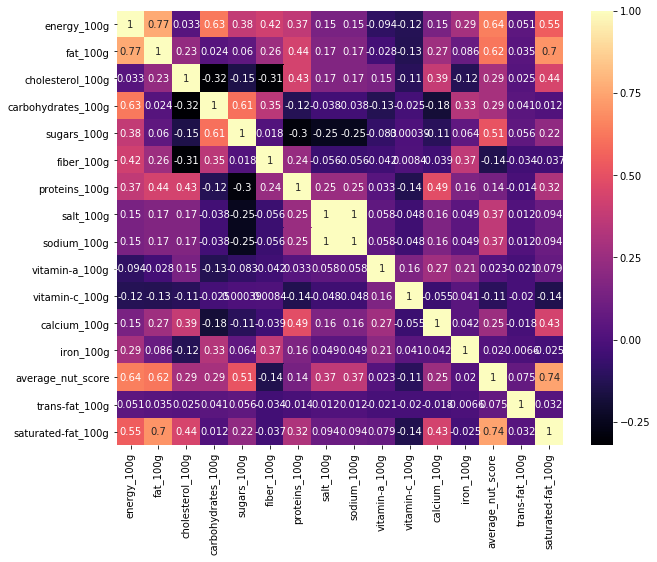

In [136]:
plt.figure(figsize=(10,8))
sns.heatmap(dfnum.corr(),cmap='magma',annot=True)

# fat, energy, sugars seem to push the score higher while vitamin C and fiber push it down
# intrestigly the score seems to be inverted since the ingredients that have high positive correlation are associated with bad food